# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Cargamos los datos

In [2]:
df = pd.read_csv("data/df_furniture.csv")
df.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     326 non-null    object 
 1   furniture_price_adjusted  331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


In [4]:
df.describe()

,furniture_price_adjusted
count,331.000000
mean,5975.765787
std,2092.867819
min,2073.432724
25%,4280.088499
50%,6075.405272
75%,7381.403461
max,10833.501852


## 2. Tratar la fecha como texto y parsear

In [5]:
df[df['Month'].isna()]

,Month,furniture_price_adjusted
15,NaN,2457.704334
21,NaN,2715.938414
39,NaN,2857.008678
40,NaN,3086.648631
60,NaN,3298.628987


In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     326 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [7]:
df[df['Month'].isna()]

,Month,furniture_price_adjusted
15,NaT,2457.704334
21,NaT,2715.938414
39,NaT,2857.008678
40,NaT,3086.648631
60,NaT,3298.628987


In [10]:
df.head(40)

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
5,1992-06-01,2384.638567
6,1992-07-01,2417.165376
7,1992-08-01,2445.498729
8,1992-09-01,2387.351705
9,1992-10-01,2489.350838


## 3. ¿De qué fecha a qué fecha va el histórico?

In [8]:
df['Month'].min()

Timestamp('1992-01-01 00:00:00')

In [9]:
df['Month'].max()

Timestamp('2019-07-01 00:00:00')

In [13]:
fechas = pd.date_range(df['Month'].min(), df['Month'].max(), freq="MS")
print(len(fechas))
print(len(fechas))

331
331


In [14]:
fechas.freq

<MonthBegin>

In [15]:
df['Month'] = fechas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     331 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

In [17]:
df.set_index("Month", inplace=True)
df.head()

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


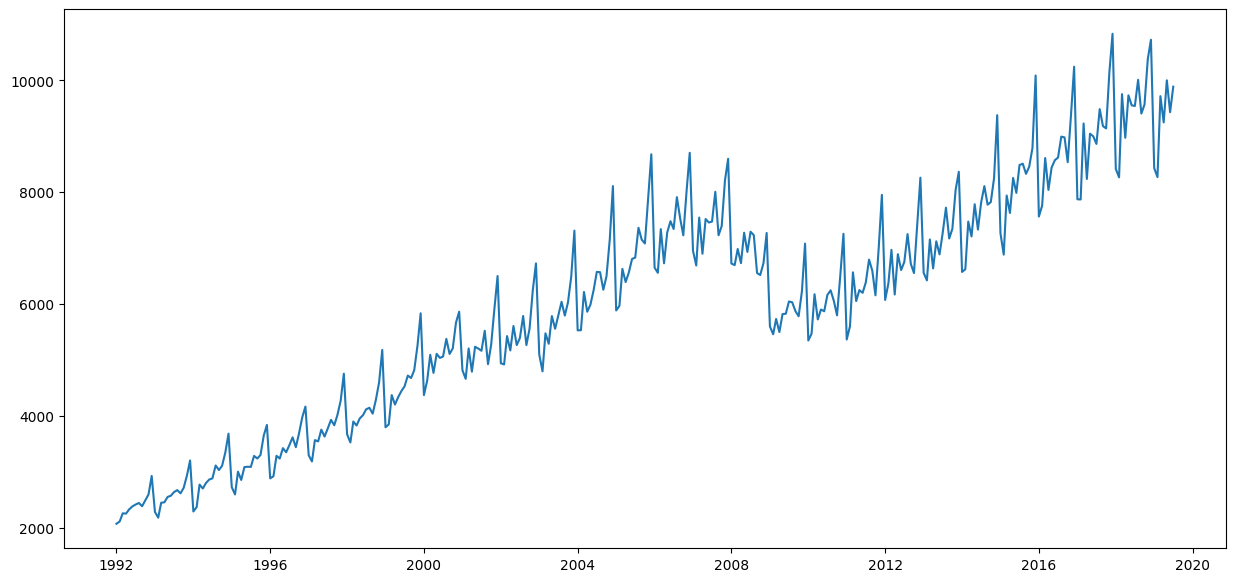

In [20]:
plt.figure(figsize=(15,7))
plt.plot(df)

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [21]:
df.describe()

,furniture_price_adjusted
count,331.000000
mean,5975.765787
std,2092.867819
min,2073.432724
25%,4280.088499
50%,6075.405272
75%,7381.403461
max,10833.501852


In [22]:
int(len(df)/2)

165

In [24]:
df[:int(len(df)/2)].describe()

,furniture_price_adjusted
count,165.000000
mean,4366.695881
std,1412.738867
min,2073.432724
25%,3115.400080
50%,4275.168742
75%,5428.334524
max,8110.153770


In [23]:
df[int(len(df)/2):].describe()

,furniture_price_adjusted
count,166.000000
mean,7575.142501
std,1270.370560
min,5349.481724
25%,6613.056182
50%,7345.578004
75%,8439.580036
max,10833.501852


In [25]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# H0: No es estacionario
# H1: Sí es estacionario

# Buscamos rechazar hipótesis nula y aceptar la alternativa, para ello calculamos p-valor

# Si pvalor es menor que el NS (0.05), rechazamos H0 y aceptamos la H1, en este caso, la serie es estacionaria
# Si pvalor es mayor que el NS (0.05), no podemos rechazar H0 y rechazamos la H1, en este caso, la serie no es estacionaria

In [26]:
result = adfuller(df['furniture_price_adjusted'])
result[1] # No es estacionaria

0.7035529748089981

## 6. ¿Conoces algún método para representar mejor la tendencia?

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
result_add = seasonal_decompose(df['furniture_price_adjusted'], model="additive")
result_add

<Axes: xlabel='Month'>

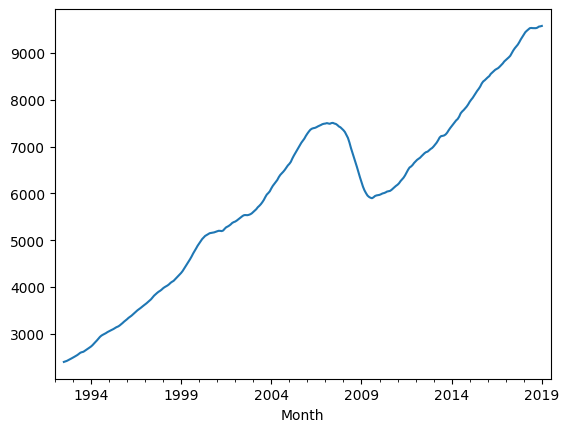

In [29]:
result_add.trend.plot()

<Axes: xlabel='Month'>

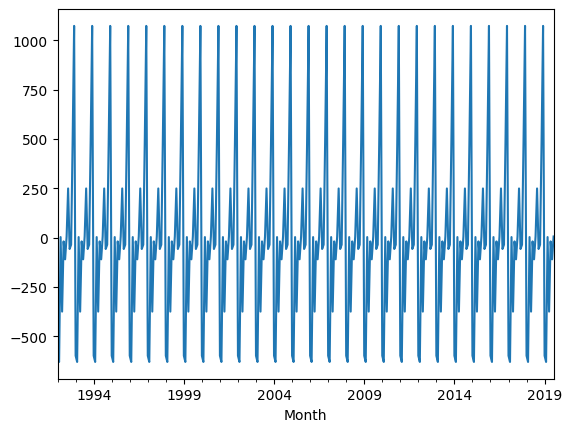

In [30]:
result_add.seasonal.plot()

In [31]:
df_ma_12 = df['furniture_price_adjusted'].rolling(12).mean()
df_ma_3 = df['furniture_price_adjusted'].rolling(3).mean()
df_ma_36 = df['furniture_price_adjusted'].rolling(36).mean()

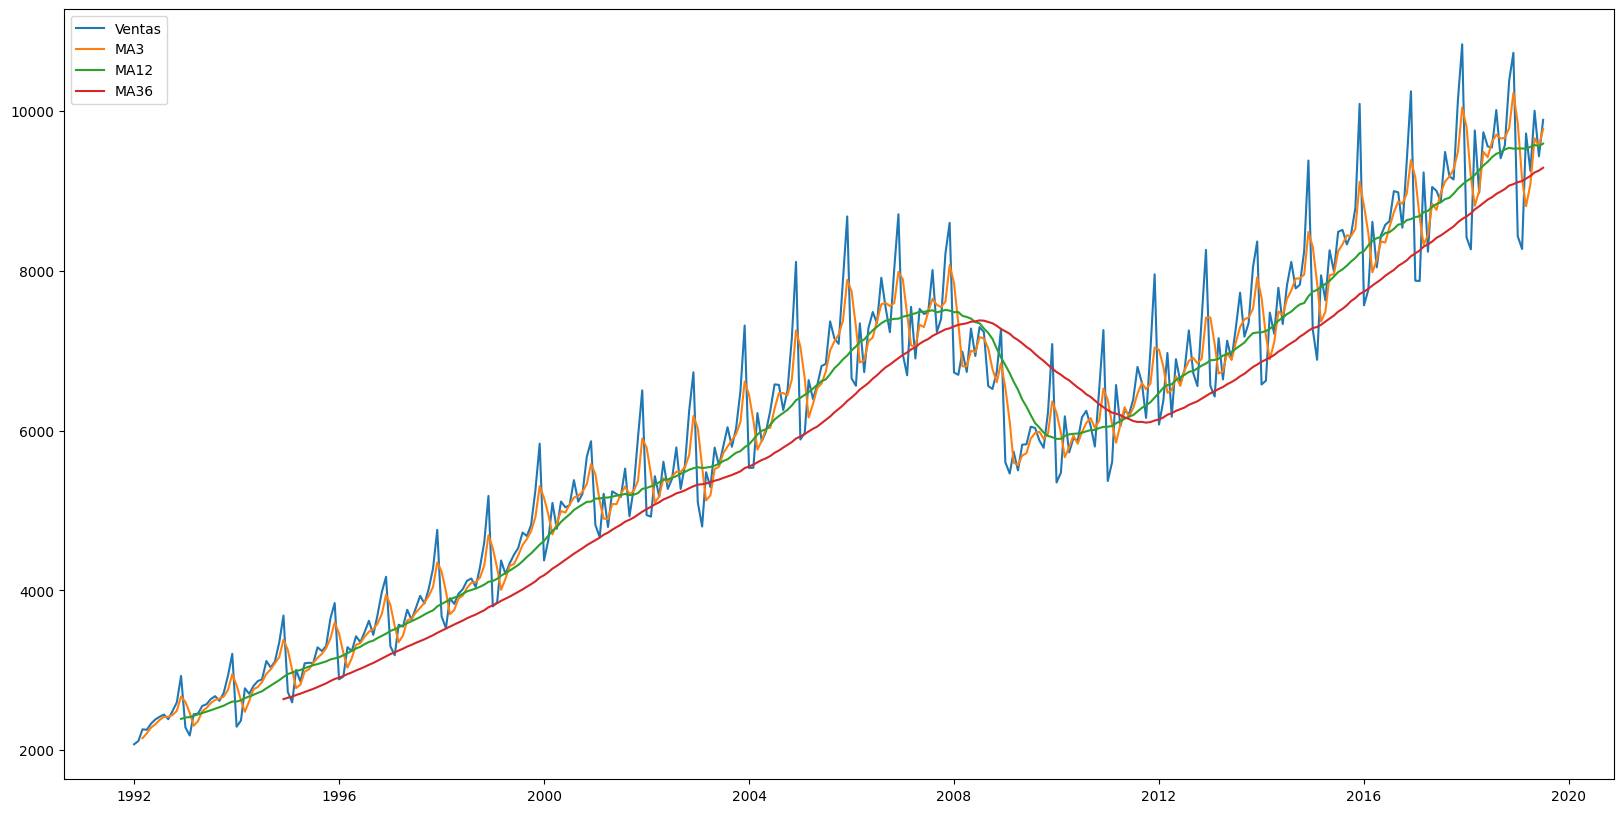

In [41]:
plt.figure(figsize=(20,10))
plt.plot(df, label= "Ventas")
plt.plot(df_ma_3, label= "MA3")
plt.plot(df_ma_12, label= "MA12")
plt.plot(df_ma_36, label= "MA36")
plt.legend()

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

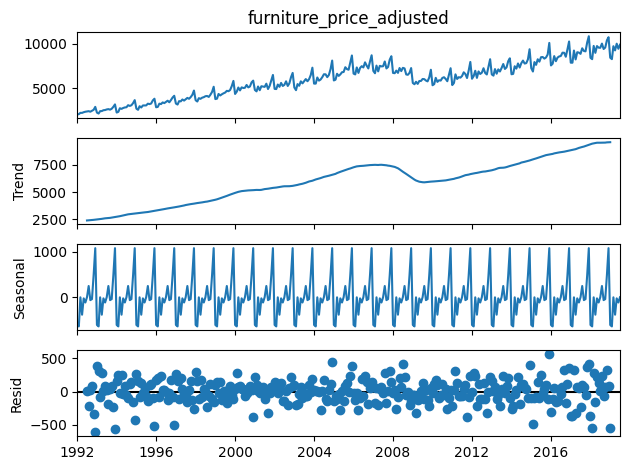

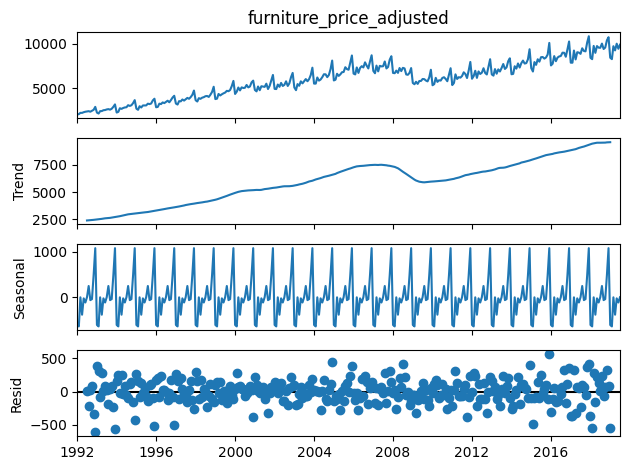

In [43]:
result_add.plot()

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

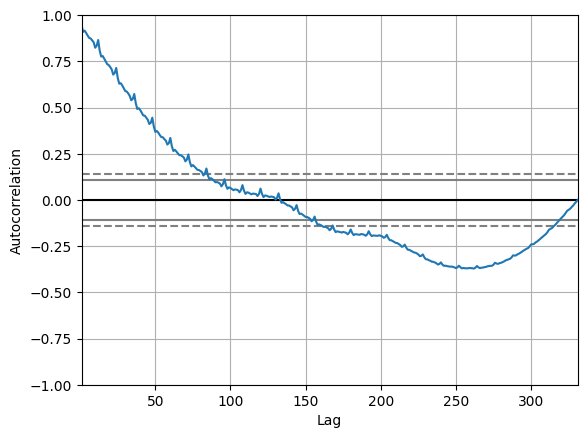

In [44]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['furniture_price_adjusted'])

## 9. ¿Qué dependencia tiene cada instante de sus últimos 5 lags? Demuéstralo mediante una matriz de correlación.

In [45]:
df.corr()

,furniture_price_adjusted
furniture_price_adjusted,1.0


In [47]:
df.head(10)

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
1992-06-01,2384.638567
1992-07-01,2417.165376
1992-08-01,2445.498729
1992-09-01,2387.351705


In [51]:
df.shift(5).head(10)

,furniture_price_adjusted
Month,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN
1992-06-01,2073.432724
1992-07-01,2114.485812
1992-08-01,2260.570891
1992-09-01,2255.103236


In [55]:
df['t-1'] = df['furniture_price_adjusted'].shift(1)
df['t-5'] = df['furniture_price_adjusted'].shift(5)
df['t-12'] = df['furniture_price_adjusted'].shift(12)

In [56]:
df.head(15)

,furniture_price_adjusted,t-1,t-5,t-12
Month,,,,
1992-01-01,2073.432724,NaN,NaN,NaN
1992-02-01,2114.485812,2073.432724,NaN,NaN
1992-03-01,2260.570891,2114.485812,NaN,NaN
1992-04-01,2255.103236,2260.570891,NaN,NaN
1992-05-01,2331.414618,2255.103236,NaN,NaN
1992-06-01,2384.638567,2331.414618,2073.432724,NaN
1992-07-01,2417.165376,2384.638567,2114.485812,NaN
1992-08-01,2445.498729,2417.165376,2260.570891,NaN
1992-09-01,2387.351705,2445.498729,2255.103236,NaN


In [57]:
df.corr()

,furniture_price_adjusted,t-1,t-5,t-12
furniture_price_adjusted,1.000000,0.951005,0.935901,0.980982
t-1,0.951005,1.000000,0.939980,0.934502
t-5,0.935901,0.939980,1.000000,0.929704
t-12,0.980982,0.934502,0.929704,1.000000


In [59]:
for i in range(1,13):
    df['t-'+str(i)] = df['furniture_price_adjusted'].shift(i)

df.head()

,furniture_price_adjusted,t-1,t-5,t-12,t-2,t-3,t-4,t-6,t-7,t-8,t-9,t-10,t-11
Month,,,,,,,,,,,,,
1992-01-01,2073.432724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-02-01,2114.485812,2073.432724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-03-01,2260.570891,2114.485812,NaN,NaN,2073.432724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-04-01,2255.103236,2260.570891,NaN,NaN,2114.485812,2073.432724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-01,2331.414618,2255.103236,NaN,NaN,2260.570891,2114.485812,2073.432724,NaN,NaN,NaN,NaN,NaN,NaN


## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

In [60]:
# Cada 12 meses

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

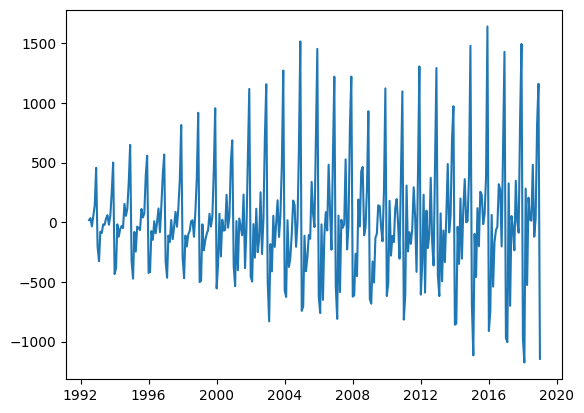

In [63]:
df['detrend_values'] = df['furniture_price_adjusted'] - result_add.trend
# df['detrend_values'].plot()
plt.plot(df['detrend_values'])

In [65]:
adfuller(df[df['detrend_values'].notna()]['detrend_values'])[1]

8.863879612517274e-06

<Axes: xlabel='Month'>

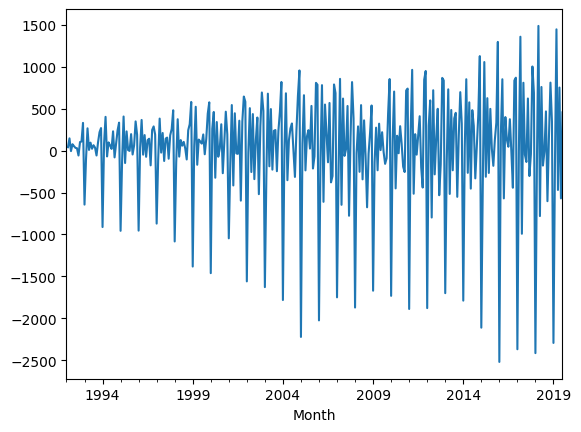

In [67]:
df['furniture_price_adjusted'].diff().plot()

In [73]:
# adfuller(df['furniture_price_adjusted'].diff())[1]